# DJIA_30_Stock_Time_Series

This jupyter is to explore the price pattern and see if it is possible to predict the further stock price 


In [90]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In the csv file, it contains all 30 stocks from 2006 to 2018

In [91]:
all_data=pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [92]:
all_data.sample(5)

,Date,Open,High,Low,Close,Volume,Name
36949,2008-10-29,21.25,23.18,20.74,21.65,32328637,HD
80889,2015-06-10,47.56,47.68,47.36,47.47,13007281,VZ
84477,2017-09-11,79.15,79.35,78.66,79.08,7000240,WMT
69487,2006-02-17,43.40,43.45,42.89,43.03,3875400,TRV
62533,2014-07-02,39.03,39.20,38.84,38.90,5577522,NKE


In [93]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [94]:
all_data.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [95]:
all_data.isnull().any()

Date      False
Open       True
High       True
Low        True
Close     False
Volume    False
Name      False
dtype: bool

Appearantly only closing price and volume have no misisng records. If so then let's just focus closing price and volumns and see if we can already predict future stock move by just two variables.

In [96]:
del all_data['Open']
del all_data['High']
del all_data['Low']

Let's have a preliminary look on data first

In [97]:
all_data.shape

(93612, 4)

Across 13 years, there are in total over 93k records 

Let's plot the closing price across all stocks

In [98]:
stock_list=all_data['Name'].unique()
stock_list

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


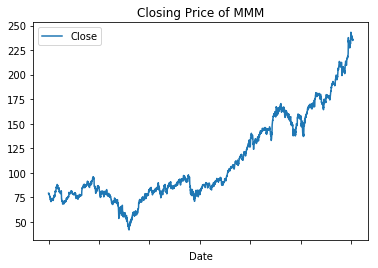

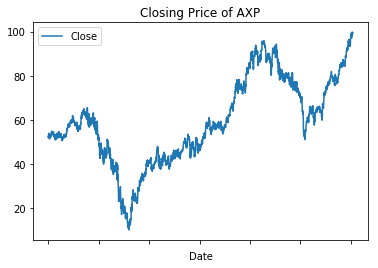

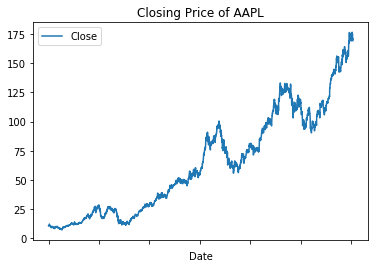

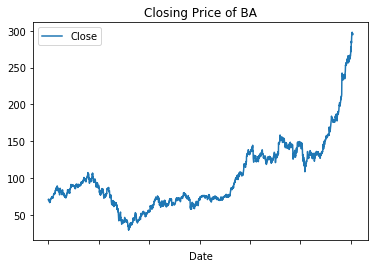

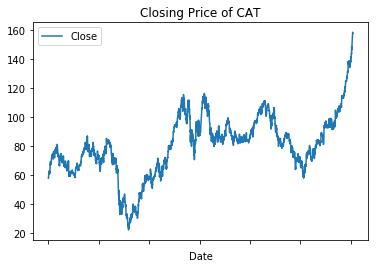

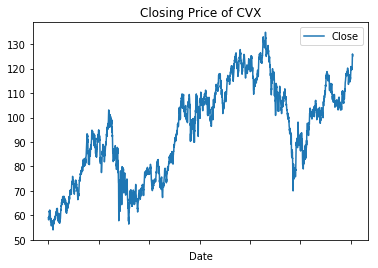

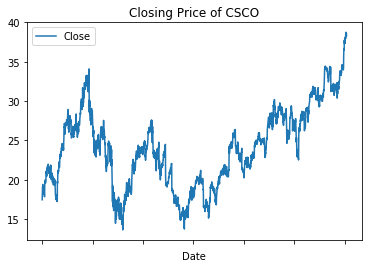

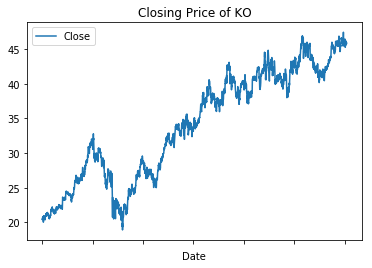

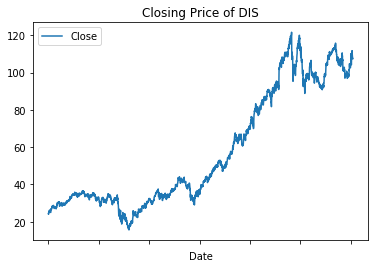

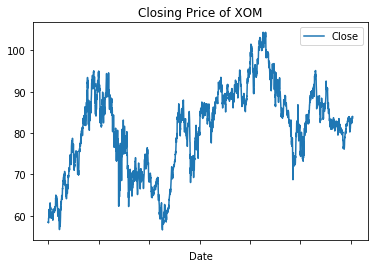

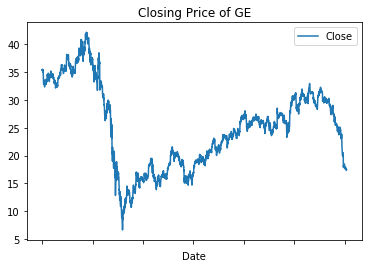

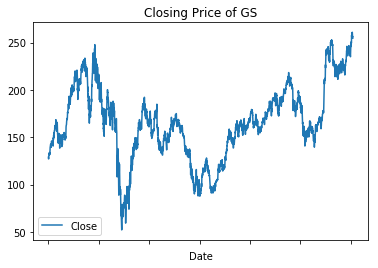

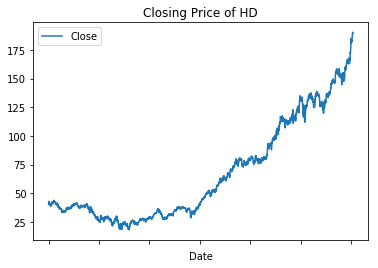

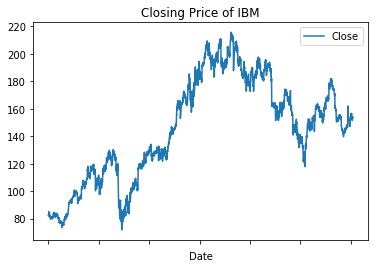

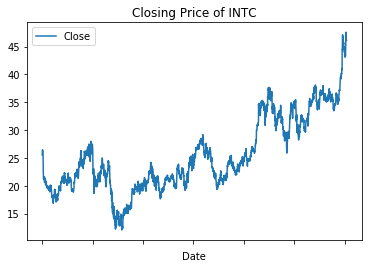

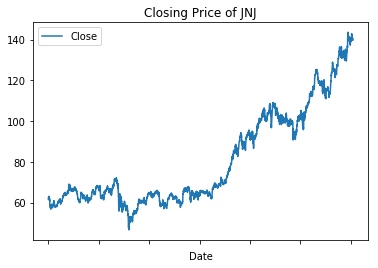

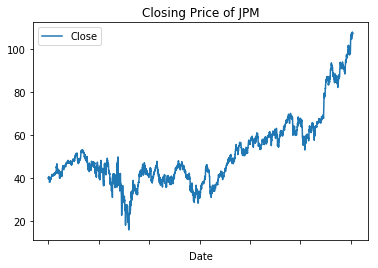

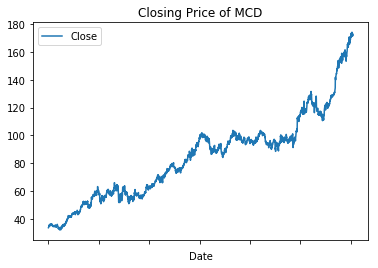

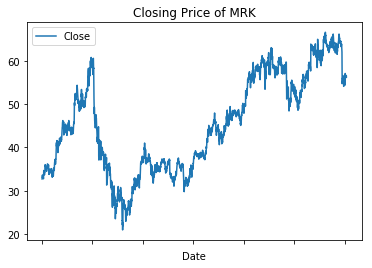

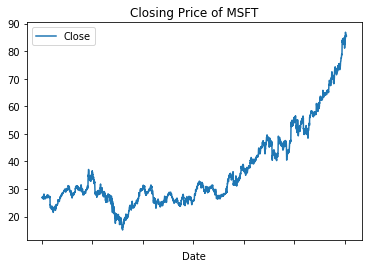

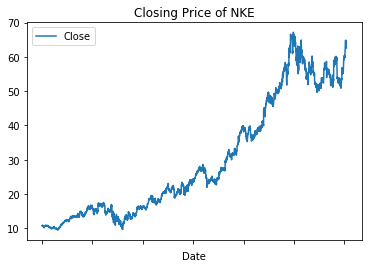

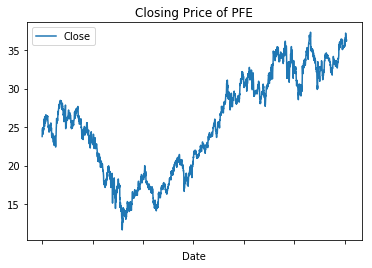

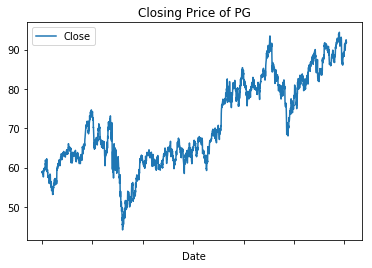

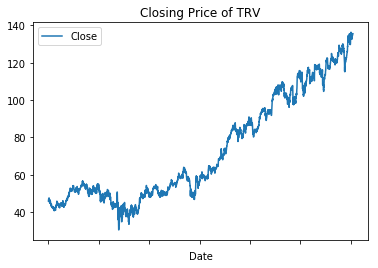

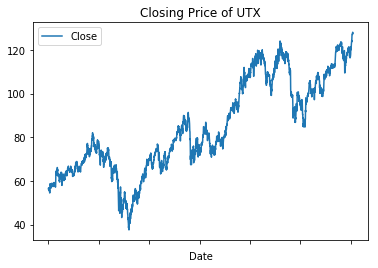

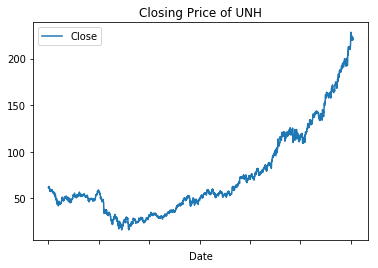

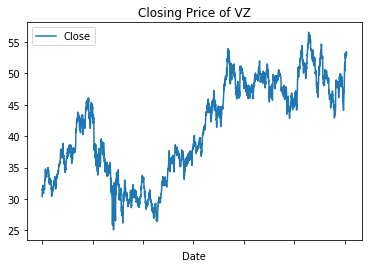

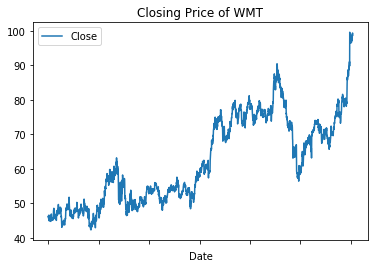

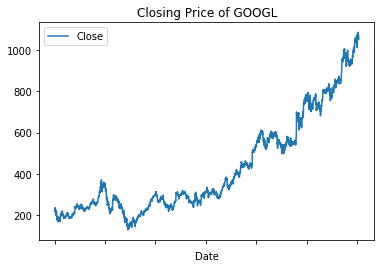

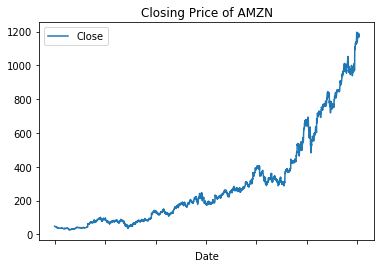

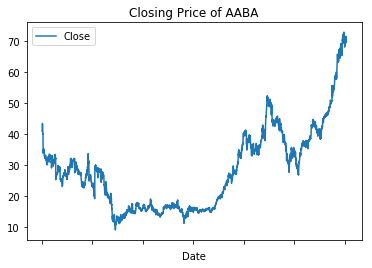

In [99]:
for i in stock_list:
     all_data[all_data['Name']==i][['Date','Close']].plot(x='Date',y='Close',title='Closing Price of {0}'.format(i))

In the following analysis, Apple stock will be picked for analysis. 

In [100]:
aapl_data=all_data[all_data['Name']=='AAPL']

In [101]:
aapl_data.reset_index(inplace=True,drop=True)
aapl_data.head()

,Date,Close,Volume,Name
0,2006-01-03,10.68,201853036,AAPL
1,2006-01-04,10.71,155225609,AAPL
2,2006-01-05,10.63,112396081,AAPL
3,2006-01-06,10.90,176139334,AAPL
4,2006-01-09,10.86,168861224,AAPL


In [102]:
aapl_data.shape

(3019, 4)

There are 3019 records for Apple 

The name column can also be deleted 

In [103]:
del aapl_data['Name']

First idea on stock prediction is through previous stock price and volume
<br>Create four columns for storing previous two days stock price and volume 

In [104]:
aapl_data['Close_l1']=aapl_data['Close'].shift(1)
aapl_data['Volume_l1']=aapl_data['Volume'].shift(1)
aapl_data['Close_l2']=aapl_data['Close'].shift(2)
aapl_data['Volume_l2']=aapl_data['Volume'].shift(2)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Because for the first record, the previous price and volume is missing. Therefore the easy way is to discard 

In [105]:
aapl_data.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
aapl_data.head()

,Date,Close,Volume,Close_l1,Volume_l1,Close_l2,Volume_l2
2,2006-01-05,10.63,112396081,10.71,155225609.0,10.68,201853036.0
3,2006-01-06,10.90,176139334,10.63,112396081.0,10.71,155225609.0
4,2006-01-09,10.86,168861224,10.90,176139334.0,10.63,112396081.0
5,2006-01-10,11.55,570088246,10.86,168861224.0,10.90,176139334.0
6,2006-01-11,11.99,373548882,11.55,570088246.0,10.86,168861224.0


In practical situation, it is impossible to predict to use trade volume of current to predict stock price. Therefore volume column will be discarded from dataset 

In [107]:
del aapl_data['Volume']

Data column can be also deleted 

In [108]:
del aapl_data['Date']

It's time for spliting training set and test set

In [109]:
X=aapl_data[aapl_data.columns.difference(['Close'])]
y=aapl_data['Close']

In [110]:
X.head()

,Close_l1,Close_l2,Volume_l1,Volume_l2
2,10.71,10.68,155225609.0,201853036.0
3,10.63,10.71,112396081.0,155225609.0
4,10.90,10.63,176139334.0,112396081.0
5,10.86,10.90,168861224.0,176139334.0
6,11.55,10.86,570088246.0,168861224.0


In [111]:
y.head()

2    10.63
3    10.90
4    10.86
5    11.55
6    11.99
Name: Close, dtype: float64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next is building up linear model 

In [113]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's have a look on prediction

In [114]:
y_predicted=lin_reg.predict(X_test)

In [115]:
r2_score(y_test,y_predicted)

0.9993332219250981

Perfect!!
<br>So by using previous two days of stock price and volume , we can predict the current stock price nearly perfect